In [1]:
!pip install -q statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from matplotlib import pyplot

In [25]:
df = pd.read_csv("data/european_wholesale_electricity_price_data_hourly/european_wholesale_electricity_price_data_hourly/Germany.csv")
df = df.sort_values(by="Datetime (UTC)")
df.index = pd.to_datetime(df["Datetime (UTC)"])
series = df["Price (EUR/MWhe)"]

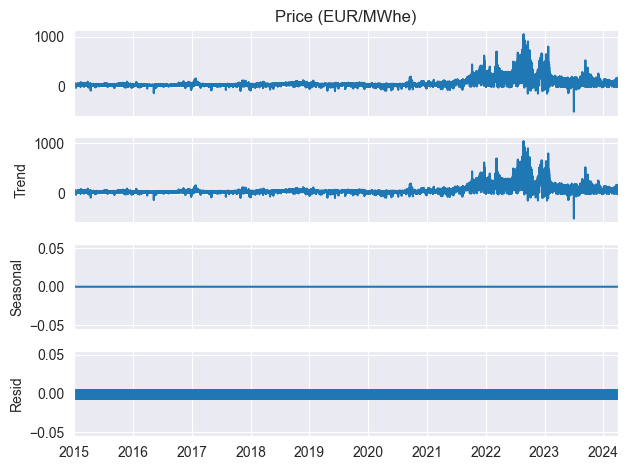

In [26]:
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

## As we see, do we see nothing
- Let's decrease Time-Frame that it does not need to fit changes ofver ages into same model

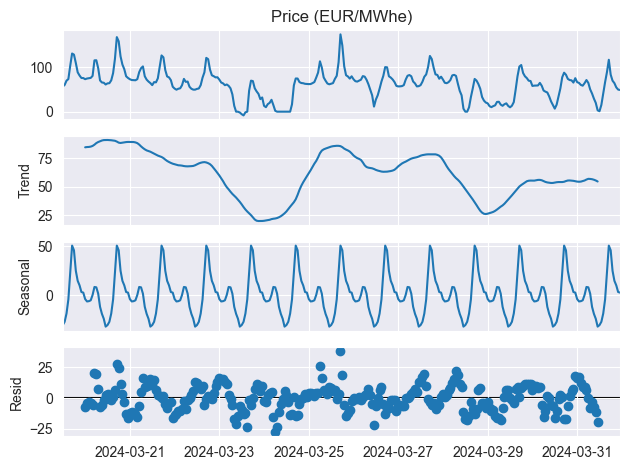

In [27]:
result = seasonal_decompose(series[-300:], model='additive')
result.plot()
pyplot.show()

## With decreased Time-Frame 
- We see a Weekly Season, i.e. on Weekends the MWhe is much cheaper (Though Timescale too small now --> considers weekly season as trend here)
- Daily Seasons were Well Identified
- We might also see a dip at the 29.03 were Good Friday was 
## Conclusion
- Forecasters might profit from including weekdays and Holidays as external influences
## Further Work Ideas
- Deeper Analysis 
- Examin different Time Spans e.g. a month, a week, a day, ...
- Identifying further External Influences
- Exploring further Time Series Forecasting Methods (AutoArima, ETS, Prophet, ...)
- Combining those with NNs (
    - Similar Approach used by AutoGluon
    - Idea: 
        - Predict the residual part that is (by definition) to hard to predict by Traditional Methods
        - Predict base repeating patterns with Traditional Methods because they are really good at this 
        - While NNs struggle with stuff like Regression to the Mean (If they do longer forecasts they just predict the mean of the Series
        - In Short: NNs make fine adjustments to the Forecast of the Traditional Methods